<a href="https://colab.research.google.com/github/guru3/ML-Experiments/blob/master/Can%20neural%20network%20break%20the%20hash%20encoding%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import hashlib
import keras
import secrets
import string
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
training_cases = 50000
test_cases = 5000
validation_cases = 5000

input_size = 256
output_size = 32 #md5

In [0]:
def get_data( total_points ):
    X = np.zeros((total_points,input_size))
    Y = np.zeros((total_points,output_size))
    for i in range(total_points):
        input_string_array = [ secrets.choice(string.digits) for i in range(input_size) ]
        X[i] = np.array( [ int(x) for x in input_string_array ] )
        output = list( hashlib.md5(''.join(input_string_array).encode()).hexdigest() )
        Y[i] = [ int(char, 16) for char in output ]
    return( X, Y)

In [0]:
train_X, train_Y = get_data(training_cases);
val_X, val_Y = get_data(validation_cases);
test_X, test_Y = get_data(test_cases);

In [0]:
model = keras.models.Sequential()
model.add( keras.layers.Dense(512, input_shape=(input_size,) ) )
model.add( keras.layers.Dense(512) )
model.add( keras.layers.Dense(256) )
model.add( keras.layers.Dense(128) )
model.add( keras.layers.Dense(output_size) )
model.compile(loss='mse', optimizer='AdaDelta', metrics=['mae'])

In [9]:
history = model.fit(train_X, train_Y, epochs=200, batch_size=4096, validation_data=(val_X,val_Y))

Train on 50000 samples, validate on 5000 samples
Epoch 1/200
50000/50000 [==============================] - 0s 10us/step - loss: 149.8369 - mae: 8.7250 - val_loss: 47.9805 - val_mae: 5.5957
Epoch 2/200
50000/50000 [==============================] - 0s 7us/step - loss: 35.2465 - mae: 4.8458 - val_loss: 27.5038 - val_mae: 4.3808
Epoch 3/200
50000/50000 [==============================] - 0s 7us/step - loss: 26.9138 - mae: 4.3473 - val_loss: 26.1327 - val_mae: 4.2956
Epoch 4/200
50000/50000 [==============================] - 0s 6us/step - loss: 26.2743 - mae: 4.3072 - val_loss: 27.9747 - val_mae: 4.4117
Epoch 5/200
50000/50000 [==============================] - 0s 6us/step - loss: 26.7618 - mae: 4.3377 - val_loss: 28.6643 - val_mae: 4.4561
Epoch 6/200
50000/50000 [==============================] - 0s 6us/step - loss: 27.1660 - mae: 4.3631 - val_loss: 28.1741 - val_mae: 4.4238
Epoch 7/200
50000/50000 [==============================] - 0s 6us/step - loss: 27.0531 - mae: 4.3562 - val_loss: 25

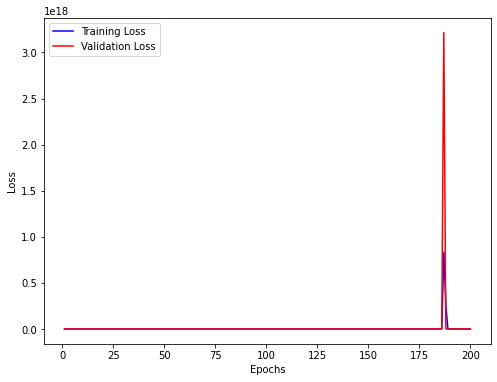

In [10]:
plt.figure(figsize=(8,6))
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training Loss')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

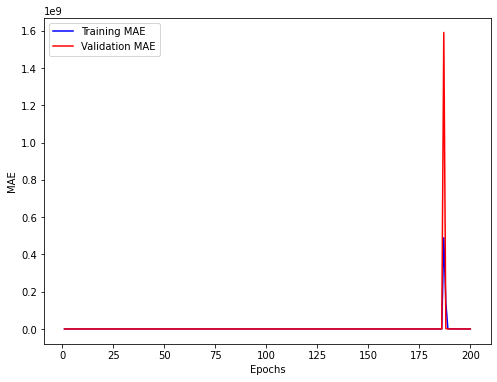

In [11]:
plt.figure(figsize=(8,6))
loss = history.history['mae']
val_loss = history.history['val_mae']
plt.plot(range(1, len(loss)+1), loss, 'b', label='Training MAE')
plt.plot(range(1, len(val_loss)+1), val_loss, 'r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [0]:
## Well, NO!